Assign assortative blocks to TPOT(-adjacent) by inspection. Look at date accounts were created, and plot the propotion of all Bluesky accounts which are TPOT(-adjacent).

In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import graph_tool.all as gt
import pandas as pd
import datetime


In [2]:
df_filtered = pickle.load(open("output/df_filtered.pkl", "rb"))
g = gt.load_graph("output/bluesky_test_graph.gt")

In [3]:
# assort
# tpot_blocks = []

# infomap
tpot_blocks = [2]

In [4]:
list(g.vp.keys())

['handle',
 'short_handle',
 'display_name',
 'description',
 'avatar_url',
 'indexed_at',
 'date_updated',
 'followers_count',
 'following_count',
 'assort_block',
 'infomap_blocks',
 'image_fn',
 'ndcsbm_level_0',
 'ndcsbm_level_1',
 'ndcsbm_level_2',
 'ndcsbm_level_3',
 'ndcsbm_level_4',
 'indexed_at_timestamp',
 'indexed_at_str']

In [5]:
# df_filtered['block'] = g.vp['assort_block'].a
df_filtered['block'] = g.vp['infomap_blocks'].a
df_filtered['tpot_adj'] = df_filtered['block'].isin(tpot_blocks)

In [6]:
# now, sorting by date_indexed use 'tpot_adj' to measure proportion of all users in TPOT at each time point.
# probably cumsum or something like that?

df_filtered.sort_values(by=['indexed_at'], inplace=True)

In [7]:
# not sure who the handful of people w/o indexed_at are, but we can drop them
f = df_filtered.indexed_at.isna()
print(f.sum())
df_filtered_indexed = df_filtered[~f].copy()

56


In [8]:
df_filtered_indexed['num_tpot_users'] = df_filtered_indexed['tpot_adj'].cumsum()
df_filtered_indexed['num_users'] = np.arange(1, len(df_filtered_indexed) + 1)

df_filtered_indexed['tpot_prop'] = df_filtered_indexed['tpot_adj'].cumsum() / np.arange(1, len(df_filtered_indexed) + 1)
df_filtered_indexed['all_prop'] = np.arange(1, len(df_filtered_indexed) + 1) / len(df_filtered_indexed)

In [9]:
df_filtered_indexed['indexed_at'] = df_filtered_indexed['indexed_at'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))

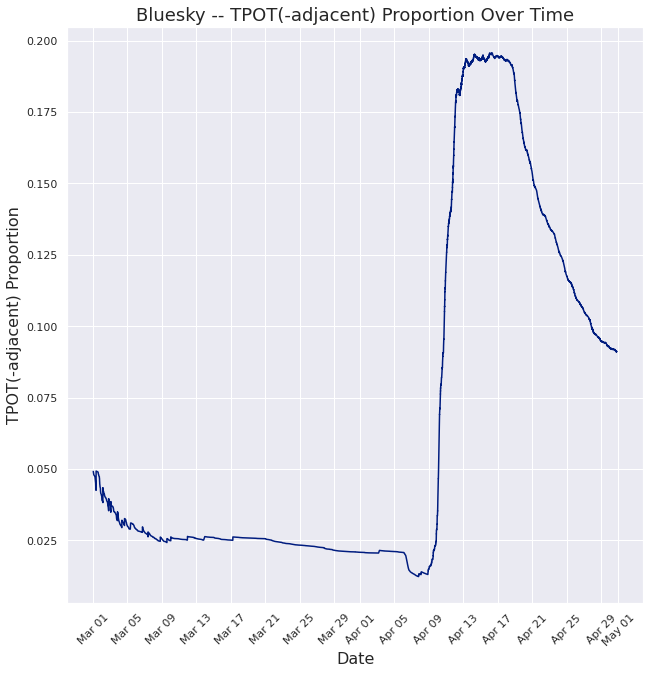

In [24]:
min_date = pd.to_datetime("2023-03-01")
df = df_filtered_indexed[df_filtered_indexed["indexed_at"] >= min_date]

# Styling
sns.set(style="darkgrid", palette="dark")

# Create the lineplot
fig, ax = plt.subplots(figsize=(10, 10))
# sns.lineplot(x="indexed_at", y="tpot_prop", data=df, ax=ax, linewidth=2.5, linestyle="dashed", marker="o")
sns.lineplot(x="indexed_at", y="tpot_prop", data=df, ax=ax)

# Set the desired number of ticks on the x-axis
locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
ax.xaxis.set_major_locator(locator)

# Format the ticks using DateFormatter
formatter = mdates.DateFormatter("%b %d")
ax.xaxis.set_major_formatter(formatter)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a title and axis labels
ax.set_title("Bluesky -- TPOT(-adjacent) Proportion Over Time", fontsize=18)
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("TPOT(-adjacent) Proportion", fontsize=16)


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)

plt.savefig("tpot_proportion_plot.png", facecolor="white", dpi=300)

# Show the plot
plt.show()

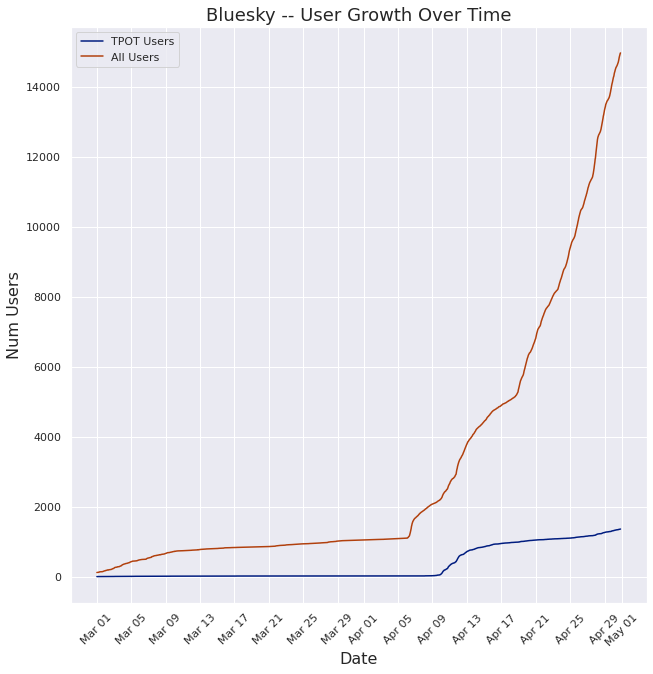

In [19]:
# Styling
sns.set(style="darkgrid", palette="dark")

# Create the lineplot
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(x="indexed_at", y="num_tpot_users", data=df, ax=ax, label="TPOT Users")
sns.lineplot(x="indexed_at", y="num_users", data=df, ax=ax, label="All Users")

# Set the desired number of ticks on the x-axis
locator = mdates.AutoDateLocator(minticks=10, maxticks=20)
ax.xaxis.set_major_locator(locator)

# Format the ticks using DateFormatter
formatter = mdates.DateFormatter("%b %d")
ax.xaxis.set_major_formatter(formatter)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a title and axis labels
ax.set_title("Bluesky -- User Growth Over Time", fontsize=18)
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Num Users", fontsize=16)

# Add a legend
ax.legend()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9)

plt.savefig("user_growth_plot.png", facecolor="white", dpi=300)

# Show the plot
plt.show()

In [12]:
df_filtered_indexed

,did,handle,display_name,description,avatar_url,indexed_at,date_updated,followers_count,following_count,block,tpot_adj,num_tpot_users,num_users,tpot_prop,all_prop
14134,did:plc:andexfnlkkjfhcomawrrv7wx,herbie.bsky.social,Herbie I,Wanna Be Astronaut.,None,2022-11-30 22:10:58.811,2023-04-30T20:00:05.567Z,69.0,14.0,7,False,0,1,0.000000,0.000067
14126,did:plc:4nrledvetpntydn6gjq7wvks,travis.bsky.social,None,None,https://cdn.bsky.social/imgproxy/zcfqImdj7laEi...,2022-12-09 22:48:07.156,2023-04-30T20:00:03.689Z,81.0,11.0,7,False,0,2,0.000000,0.000134
14808,did:plc:vzmlifz3ghar4cu2hj3srga2,martinkl.com,Martin Kleppmann,Researcher in distributed/decentralised system...,https://cdn.bsky.social/imgproxy/MaBfvMEIFZOmR...,2022-12-10 21:27:51.773,2023-04-30T20:06:22.800Z,770.0,57.0,7,False,0,3,0.000000,0.000200
14136,did:plc:akyopoapqza6xjzthjnandaz,wills.co.tt,willscott,Web Hacker,https://cdn.bsky.social/imgproxy/LygN1kLsy1s2U...,2022-12-12 23:37:18.170,2023-04-30T20:00:06.022Z,347.0,87.0,7,False,0,4,0.000000,0.000267
14120,did:plc:xutnox3ftsppgokcvr5os6om,kwkroeger.kwk.io,Kurt Kroeger,Just trying to understand how the world works,https://cdn.bsky.social/imgproxy/7d68UD7S85xaA...,2022-12-13 02:26:50.322,2023-04-30T20:00:02.333Z,330.0,107.0,7,False,0,5,0.000000,0.000334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14654,did:plc:53xciwd3w4lzukxvrr4p7wqt,rieck.in,Simon Rieck,Wasted German Youth,https://cdn.bsky.social/imgproxy/TI998GbiZCQsV...,2023-04-30 19:38:02.366,2023-04-30T20:04:21.134Z,103.0,76.0,23,False,1364,14962,0.091164,0.999733
13072,did:plc:5cn7tila5pqvqk7jbkgfz6hd,303.bsky.social,Justin Maxwell,Was @303 on twitter and my avi was a 🤖 \n\neli...,https://cdn.bsky.social/imgproxy/GRIzbjUDC-cPz...,2023-04-30 19:38:02.386,2023-04-30T19:50:21.811Z,185.0,179.0,13,False,1364,14963,0.091158,0.999800
14395,did:plc:sjp7tdeiw5wvgdb4h2xts4sq,haider.bsky.social,Haider Ali Punjabi,Software Developer\n\nBots on BlueSky:\n@yearp...,https://cdn.bsky.social/imgproxy/tKJ76wWZ8XQtz...,2023-04-30 20:00:15.769,2023-04-30T20:01:19.841Z,125.0,58.0,7,False,1364,14964,0.091152,0.999866
15017,did:plc:t26a7mehx4kh4z7ngnp6mytq,wife.pics,mia,cisadmin,https://cdn.bsky.social/imgproxy/Eu_CXNLYmvaN7...,2023-04-30 20:04:59.346,2023-04-30T20:14:37.762Z,522.0,119.0,1,False,1364,14965,0.091146,0.999933


In [13]:
from ftlangdetect import detect
from collections import Counter

languages = np.array([detect(text=s.replace("\n", " "), low_memory=True)['lang'] if s is not None else "en" for s in df_filtered['description']])